# Data Glacier Internship Final Project

# Connect to Google Drive

Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


Move to the Target Directory by using the Copied Path

In [ ]:
%cd /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+

/content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+


List the Files present into the Current Directory

In [ ]:
!ls

Dataset_DA.xlsx		      Healthcare_dataset.xlsx  __pycache__
Dataset_Dummy.xlsx	      ml_models.py	       Unet_Model.py
Dataset.xlsx		      Model.h5
DG_Project_Health_Plus.ipynb  PPG2ABP_UCI.ipynb


Upload local files into GDrive

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset_DA.xlsx to Dataset_DA.xlsx
User uploaded file "Dataset_DA.xlsx" with length 726655 bytes


#Import Necessary Libraries

In [ ]:
import os
import PIL
import h5py
import scipy
import PIL.Image
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
%matplotlib inline
sns.set_style('white')

# Data Analysis

## Data Pre-Processing

In [ ]:
df = pd.read_excel('Dataset.xlsx')

In [ ]:
df.drop(columns= ['Ptid'],inplace= True)

In [ ]:
df

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,0,0,3,2,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,2,2,2,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,1,0,1,0,3,3,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,0,0,0,0,1,1,1,0,3,3,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,0,0,0,0,1,0,2,2,2,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,2,2,2,2,1,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3420,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,1,0,2,2,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3421,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,0,7,1,0,0,0,1,1,0,3,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3422,Fem

In [ ]:
df_dummy = pd.DataFrame()

In [ ]:
for i in range(0,len(df.columns)):
  if(i<=7):
    X = df[df.columns[i]]
    Y = pd.get_dummies(X)
    df_dummy = pd.concat([df_dummy, Y], axis=1)
  elif(i>7):
    X = df[df.columns[i]]
    df_dummy = pd.concat([df_dummy, X], axis=1)

In [ ]:
df_dummy

,Female,Male,African American,Asian,Caucasian,Other/Unknown,Hispanic,Not Hispanic,Unknown,Midwest,Northeast,Other/Unknown,South,West,55-65,65-75,<55,>75,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,...,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3420,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3421,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3422,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_dummy.to_excel('Dataset_Dummy.xlsx', sheet_name= 'Dummy')

In [ ]:
if (df_dummy.isnull().values.any() == False):
  print(f'Total NULL values in the Original DataFrame = {df_dummy.isnull().sum().sum()}')
  print(df_dummy.isnull().sum())
  for i in range(0,len(df_dummy.columns)):
    df_dummy[df_dummy.columns[i]] = df_dummy[df_dummy.columns[i]].fillna(0)

Total NULL values in the Original DataFrame = 0
Female                      0
Male                        0
African American            0
Asian                       0
Caucasian                   0
                           ..
Risk_Estrogen_Deficiency    0
Risk_Immobilization         0
Risk_Recurring_Falls        0
Count_Of_Risks              0
Persistency_Flag            0
Length: 119, dtype: int64


## Statistical Outcomes

Upload Descriptive Plots from MS Excel Pivot Charts from Google Drive

In [ ]:
%cd /content/
!gdown --id 1jhKhP0yE2ldQDpxwNNWLDZDmq1PKJluP
!gdown --id 1jhtHScKs9s24MIUIdzstX9o_bJwMyqSO
!gdown --id 1X-UAbmJtGto7fYIe3VPELsOxDCQZI-ns
!gdown --id 1CWuvegZri_p0ECPktTN7a3IFTW69Pudc
!gdown --id 1n0GQ6sZPfvynYaJPrPaXpojbZvXVVRhz
!gdown --id 1bD-wz_AwTzHEw6nrWe5VhDr3oZE-H8G5
!gdown --id 1G7v6ZZzYfQ2LFh29Lc7RPe9ThM0nwGWZ
!gdown --id 1nFDnQJtbu5Pe5SENYbZPjjb4j6Q-hslm

These plots represent the Demographic Proportions of the Dataset in terms of Gender, Race, Ethnicity, Age-Bucket, Region and IDN-Indicator. Data Imabalance can be noticed in terms of Gender and Ethnicity.

/content


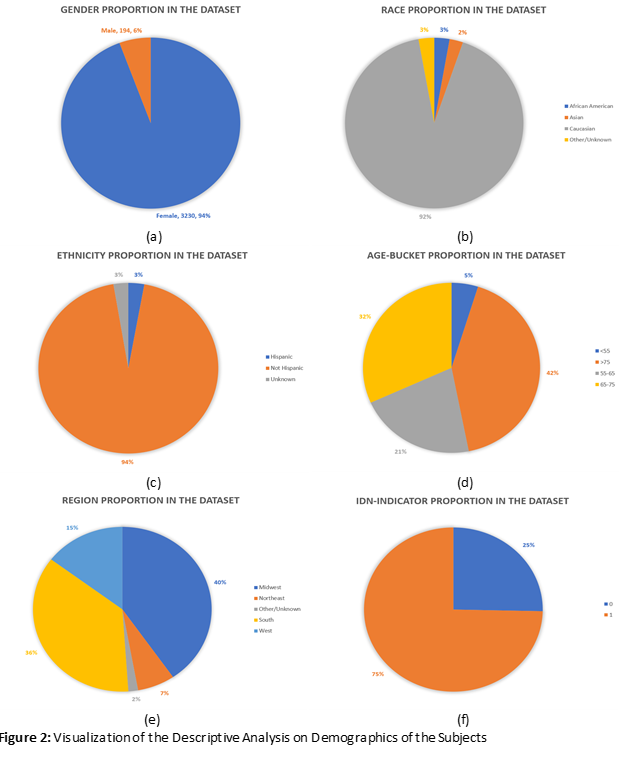

In [ ]:
%cd /content/
PIL.Image.open('Demographics.png')

The following colum chart helps us visualize the NTM Speiciality Type and Specialist Flag of the responsible medical staff. It can be seen that for some diseases, the doctor was always a specialist. On the other hand, most cases were dealt by General Practitioners.

/content


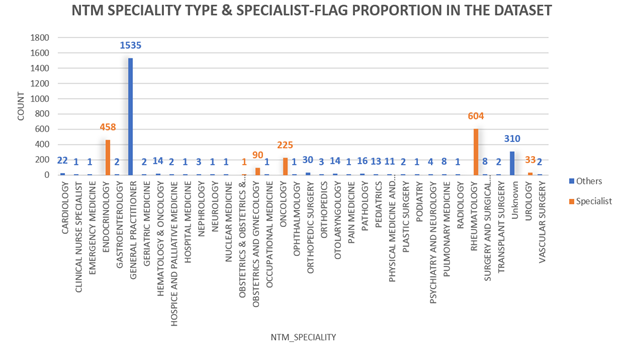

In [ ]:
%cd /content/
PIL.Image.open('NTM Speciality Type and Specialist Flag.png')

This stacked percentage column chart represents the Concomitancy of various drugs. The rates vary for different drugs from as low as 10% to as high as 35%.

/content


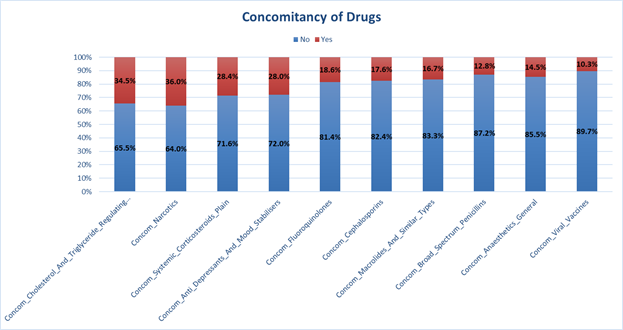

In [ ]:
%cd /content/
PIL.Image.open('Concomitancy of Drugs.png')

Comorbidity of diseases have been represented by the following column chart. For some cases, the rate is quite high.

/content


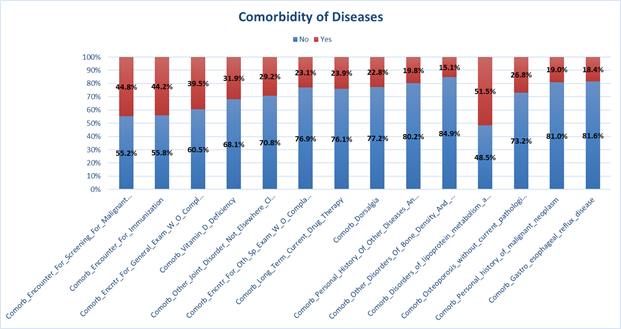

In [ ]:
%cd /content/
PIL.Image.open('Comorbidity of Diseases.png')

This chart shows various Risk Factors among the patients regarding the medication which related to Patient Persistency of the Drug.

/content


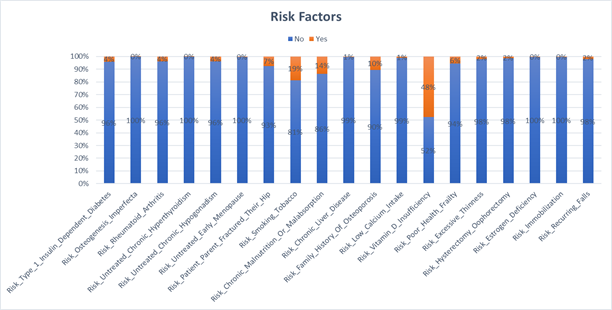

In [ ]:
%cd /content/
PIL.Image.open('Risk Factors.png')

The following 3 charts show the Standard Error, Skewness and Kurtosis present in the dataset after all columns (i.e., variables) were normalized within the same range. It greatly helped in determining the imbalance and non-normality present in the dataset.

/content


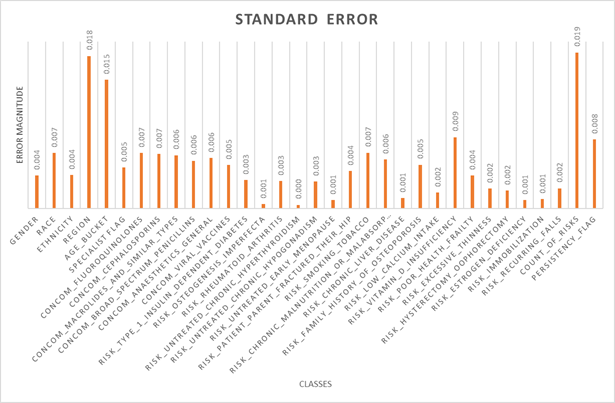

In [ ]:
%cd /content/
PIL.Image.open('Standard Error.png')

This shows that the Demographic parameters are follow the normal curve much better than clinical and phermaceutical parameters.

/content


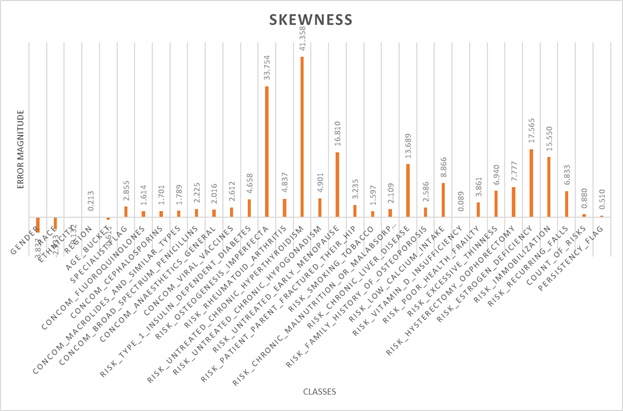

In [ ]:
%cd /content/
PIL.Image.open('Skewness.png')

Since Kurtosis is a statistical term closely related to Skewness, similar trend can be seen in this case as well.

/content


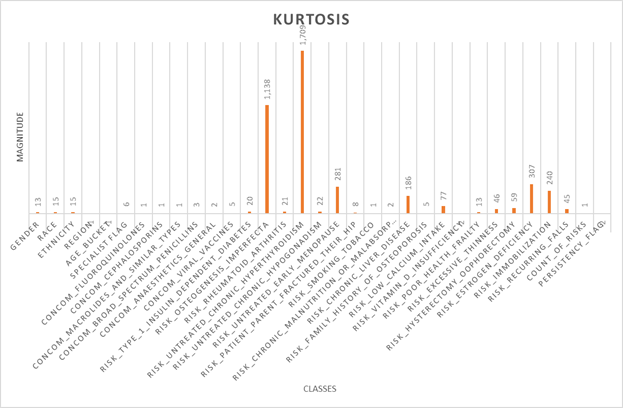

In [ ]:
%cd /content/
PIL.Image.open('Kurtosis.png')